### Here I have tried to classify a customer wheather he/she is eligilbe for loan or not consedering the following categoreis:
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. ApplicantIncome
7. CoapplicantIncome
8. LoanAmount
9. Loan_Amount_Term
10. Credit_History
11. Property_Area

Later on this notebook you can also check the model by providing your own data and predicting if the provided data can be considered for loan or not

# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

# Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('train.csv')

In [3]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Understanding the data

In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.ndim

2

In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_dataset.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002347,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan_dataset.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_dataset.isnull().mean().sort_values(ascending=False)*100

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
loan_dataset.duplicated().sum()

0

In [12]:
loan_dataset.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

In [13]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [14]:
loan_dataset.dropna(inplace=True)

In [15]:
loan_dataset.drop(["Loan_ID"], axis=1, inplace=True)

In [16]:
loan_dataset.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
# Replaceing 3+ to 4 as + cant be processed while modelling with 4 as a generic value
loan_dataset["Dependents"].replace({"3+":4}, inplace=True) # or df["Dependents"].replace(to_replace = "3+", value=4)

In [19]:
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

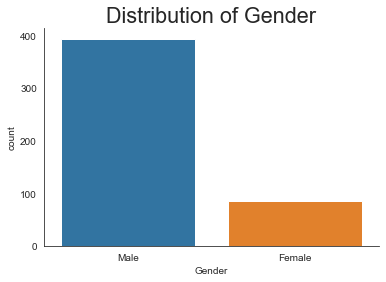

In [20]:
sns.set_style("white")
sns.countplot(loan_dataset["Gender"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Distribution of Gender")
plt.show()

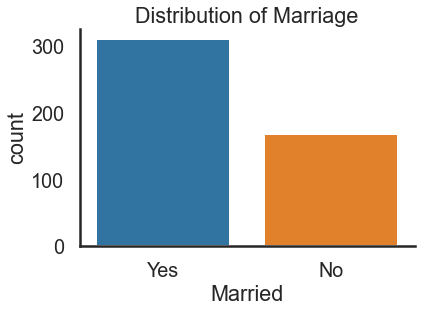

In [21]:
sns.set_style("white")
sns.countplot(loan_dataset["Married"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Distribution of Marriage")
plt.show()

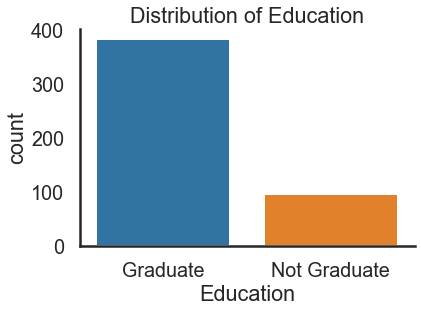

In [22]:
sns.set_style("white")
sns.countplot(loan_dataset["Education"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Distribution of Education")
plt.show()

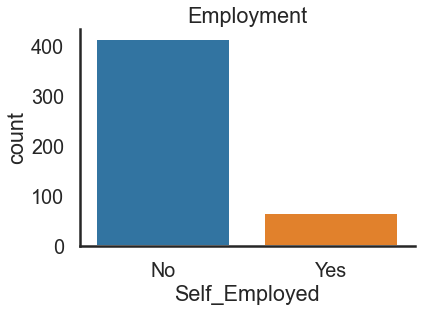

In [23]:
sns.set_style("white")
sns.countplot(loan_dataset["Self_Employed"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Employment")
plt.show()

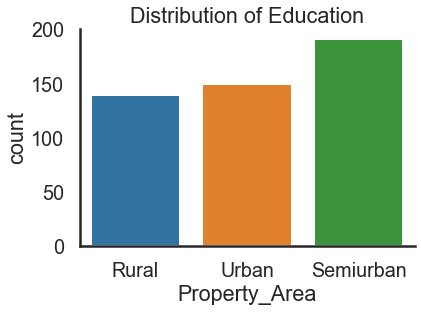

In [24]:
sns.set_style("white")
sns.countplot(loan_dataset["Property_Area"])
#sns.set_context("Loan_Amount_Term", font_scale=0.9)
sns.despine()

plt.title("Distribution of Education")
plt.show()

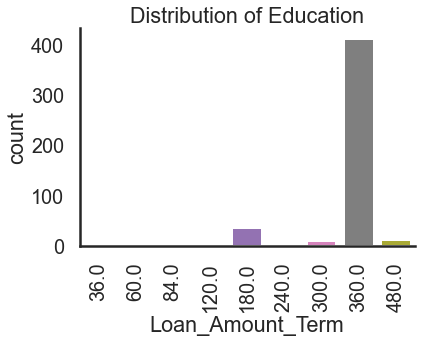

In [25]:
sns.set_style("white")
sns.countplot(loan_dataset["Loan_Amount_Term"])
#sns.set_context("Loan_Amount_Term", font_scale=0.9)
sns.despine()

plt.title("Distribution of Education")
plt.xticks(rotation=90)
plt.show()

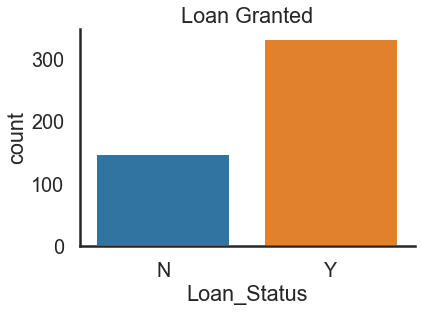

In [26]:
sns.set_style("white")
sns.countplot(loan_dataset["Loan_Status"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan Granted")
plt.show()

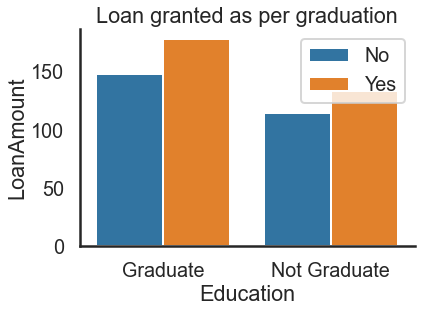

In [27]:
sns.set_style("white")
sns.barplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"], ci=None)
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

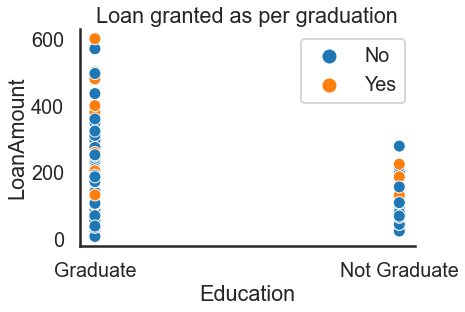

In [28]:
sns.set_style("white")
sns.scatterplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"], ci=None)
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

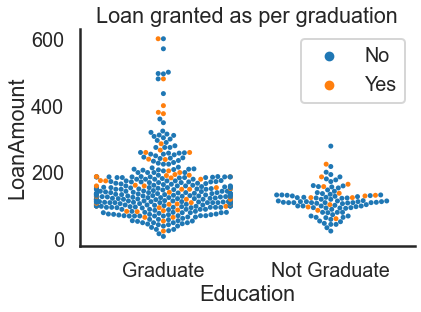

In [29]:
sns.set_style("white")
sns.swarmplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

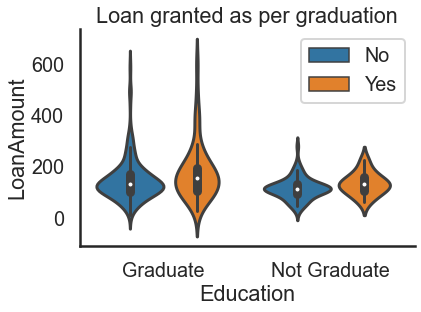

In [30]:
sns.set_style("white")
sns.violinplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

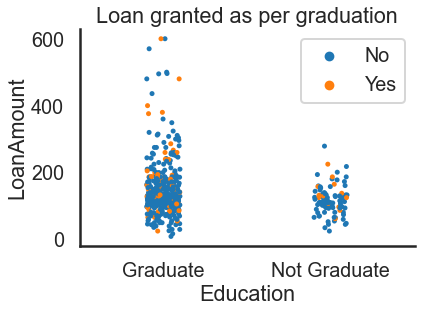

In [31]:
sns.set_style("white")
sns.stripplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

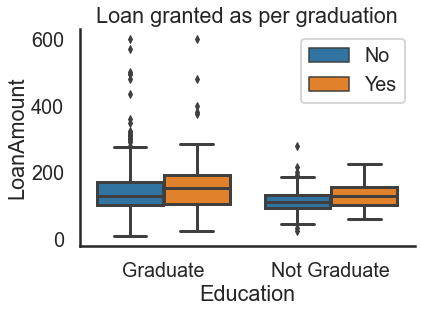

In [32]:
sns.set_style("white")
sns.boxplot(loan_dataset["Education"], loan_dataset["LoanAmount"], hue=loan_dataset["Self_Employed"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

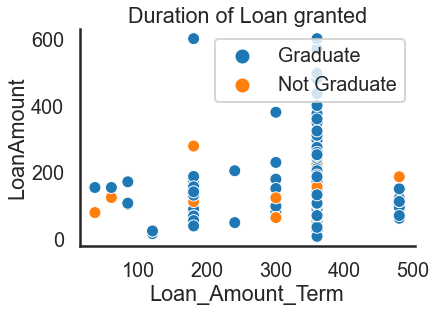

In [33]:
sns.set_style("white")
sns.scatterplot(loan_dataset["Loan_Amount_Term"], loan_dataset["LoanAmount"], hue=loan_dataset["Education"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Duration of Loan granted")
plt.legend(loc="upper right")
plt.show()

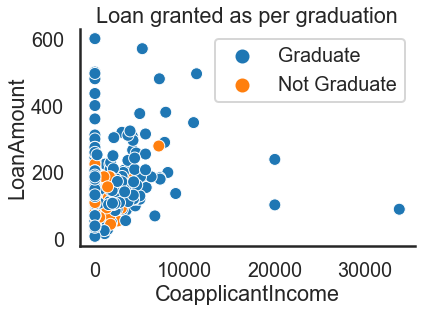

In [34]:
sns.set_style("white")
sns.scatterplot(loan_dataset["CoapplicantIncome"], loan_dataset["LoanAmount"], hue=loan_dataset["Education"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

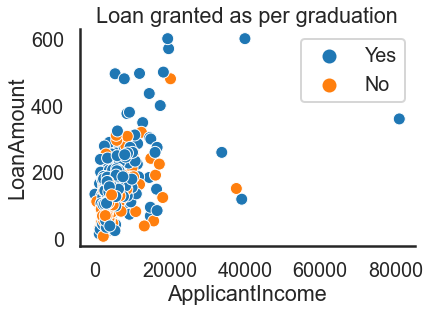

In [35]:
sns.set_style("white")
sns.scatterplot(loan_dataset["ApplicantIncome"], loan_dataset["LoanAmount"], hue=loan_dataset["Married"])
sns.set_context("poster", font_scale=0.9)
sns.despine()

plt.title("Loan granted as per graduation")
plt.legend(loc="upper right")
plt.show()

# Feature Engineering

In [36]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [37]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

# Train Test Split

In [39]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [40]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [41]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


# Modelling

# Support Vector Machine

In [43]:
classifier = svm.SVC(kernel='linear')

In [44]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [79]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [46]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [47]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [48]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)


LogisticRegression()

In [84]:
X_train_prediction = lr.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [85]:
print('Accuracy on training data  : ', training_data_accuray)

Accuracy on training data  :  0.8009259259259259


In [86]:
X_test_prediction = lr.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [87]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


# Predicting with new datas

In [50]:
loan_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [77]:
def new_data(a,b,c,d,e,f,g,h,i,j,k):
    input_data = (a,b,c,d,e,f,g,h,i,j,k)

    input_data = np.asarray(input_data)

    # reshaping the np array as we are predicitng for one instance
    input_data_reshaped = input_data.reshape(1,-1)


    prediction = classifier.predict(input_data_reshaped)
    return(prediction)

prediction = new_data(1,1,1,1,1,5,5,0,0,0,0)
print(prediction)
if prediction == 1:
    print("Congratulation! you have been granted loan.")
else:
    print("Sorry! Your loan request was denied.")

    

[0]
Sorry! Your loan request was denied.


In [78]:
def new_data(a,b,c,d,e,f,g,h,i,j,k):
    input_data = (1,1,1,1,1,5000,3600,250,360,1,3)

    input_data = np.asarray(input_data)

    # reshaping the np array as we are predicitng for one instance
    input_data_reshaped = input_data.reshape(1,-1)


    prediction = classifier.predict(input_data_reshaped)
    return(prediction)

prediction = new_data(1,1,1,1,1,5,5,0,0,0,0)
print(prediction)
if prediction == 1:
    print("Congratulation! you have been granted loan.")
else:
    print("Sorry! Your loan request was denied.")

    

[1]
Congratulation! you have been granted loan.
